In [1]:
!pip install pybaobabdt

In [2]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [3]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import graphviz
import pybaobabdt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
attrition = pd.read_excel('/content/drive/My Drive/DAT650/EmployeeAttritionData.xlsx', index_col = "EmployeeNumber")

In [5]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [6]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [8]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [9]:
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


In [10]:
#dropping unneeded columns and columns that could introduce bias
attrition.drop(["EmployeeCount", "StandardHours", "Gender", "Age", "Over18", "MaritalStatus"],axis =1, inplace = True)

In [11]:
attrition.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
attrition_encoded = attrition.replace(to_replace={'BusinessTravel': {'Non-Travel': 1,
                                                                     'Travel_Frequently':2, 
                                                                     'Travel_Rarely': 3 }})

In [13]:
attrition_encoded = attrition_encoded.replace(to_replace = {"Department": {"Human Resources": 1, 
                                                                   "Research & Development": 2,
                                                                  "Sales": 3}})

In [14]:
attrition_encoded = attrition_encoded.replace(to_replace = {"EducationField": {"Human Resources": 1, 
                                                                               "Life Sciences": 2,
                                                                                "Marketing": 3,
                                                                              "Medical": 4,
                                                                              "Other": 5,
                                                                              "Technical Degree": 6}})

In [15]:
attrition_encoded = attrition_encoded.replace(to_replace = {"JobRole": {"Healthcare Representative": 1, 
                                                                        "Human Resources": 2,
                                                                        "Manager": 3,
                                                                        "Manufacturing Director": 4,
                                                                        "Research Director": 5,
                                                                        "Research Scientist": 6,
                                                                       "Sales Executive": 7,
                                                                       "Sales Representative": 8,
                                                                       "Laboratory Technician": 9}})

In [16]:
attrition_encoded = attrition_encoded.replace(to_replace = {"OverTime": {"Yes": 1, 
                                                                           "No": 2}})

In [17]:
attrition_encoded = attrition_encoded.replace(to_replace = {"Attrition": {"Yes": 1, 
                                                                           "No": 2}})

In [18]:
attrition_encoded

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,1,3,1102,3,1,2,2,2,94,3,...,3,1,0,8,0,1,6,4,0,5
2,2,2,279,2,8,1,2,3,61,2,...,4,4,1,10,3,3,10,7,1,7
4,1,3,1373,2,2,2,5,4,92,2,...,3,2,0,7,3,3,0,0,0,0
5,2,2,1392,2,3,4,2,4,56,3,...,3,3,0,8,3,3,8,7,3,0
7,2,3,591,2,2,1,4,1,40,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,2,2,884,2,23,2,4,3,41,4,...,3,3,1,17,3,3,5,2,0,3
2062,2,3,613,2,6,1,4,4,42,2,...,3,1,1,9,5,3,7,7,1,7
2064,2,3,155,2,4,3,2,2,87,4,...,4,2,1,6,0,3,6,2,0,3


In [19]:
fig = px.bar(attrition_encoded.Attrition)
fig.show()

In [20]:
px.box(attrition_encoded, title = "Box Plot")

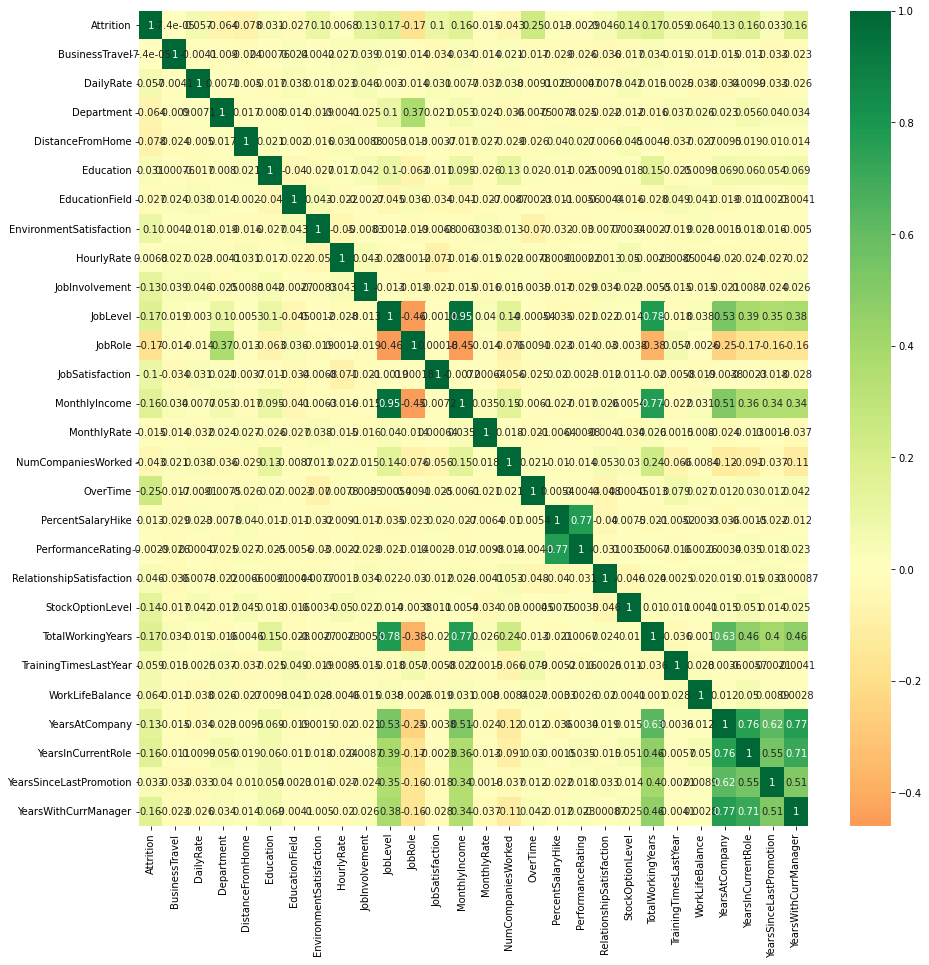

In [21]:
plt.figure(figsize=(15,15))
p=sns.heatmap(attrition_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

# Prepping for modeling by splitting into testing and training

In [22]:
#Prepping it for the neural net
X = attrition_encoded.drop(['Attrition'],axis=1)
y = attrition_encoded.Attrition

In [23]:
#splitting the dataset into testing the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
X_train.columns

Index(['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Neural Net Modeling

In [25]:
#scaling the data so that one variable doesnt dominate
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [26]:
def build_fc_model():
  fc_model = tf.keras.Sequential([

    tf.keras.layers.Dense(60, kernel_initializer = 'uniform', activation = 'relu', input_dim = 27),
        
    tf.keras.layers.Dense(60, kernel_initializer = 'uniform', activation = 'sigmoid'),

    tf.keras.layers.Dense(60, kernel_initializer = 'uniform', activation = 'sigmoid'),

    tf.keras.layers.Dense(60, kernel_initializer = 'uniform', activation = 'sigmoid'),
      
    tf.keras.layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')
      
  ])
  return fc_model

model = build_fc_model()

In [27]:
model.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
model.fit(X_train, y_train, batch_size = 12, epochs = 100, verbose = 0)

In [29]:
score, acc = model.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

118/118 [==============================] - 0s 2ms/step - loss: -501.0485 - accuracy: 0.1599
Train score: -501.04852294921875
Train accuracy: 0.15986394882202148


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from statistics import mean

Testing to determine what the best random forest will be

In [31]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,20,40,100],
    "max_depth":[2,4,8,16,32,None]
    
}

In [32]:
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 20, 40, 100]})

In [33]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [34]:
display(cv)

Best parameters are: {'max_depth': 32, 'n_estimators': 40}


0.843 + or -0.005 for the {'max_depth': 2, 'n_estimators': 5}
0.842 + or -0.001 for the {'max_depth': 2, 'n_estimators': 10}
0.84 + or -0.002 for the {'max_depth': 2, 'n_estimators': 20}
0.84 + or -0.002 for the {'max_depth': 2, 'n_estimators': 40}
0.84 + or -0.002 for the {'max_depth': 2, 'n_estimators': 100}
0.85 + or -0.011 for the {'max_depth': 4, 'n_estimators': 5}
0.844 + or -0.003 for the {'max_depth': 4, 'n_estimators': 10}
0.848 + or -0.004 for the {'max_depth': 4, 'n_estimators': 20}
0.847 + or -0.007 for the {'max_depth': 4, 'n_estimators': 40}
0.847 + or -0.005 for the {'max_depth': 4, 'n_estimators': 100}
0.855 + or -0.007 for the {'max_depth': 8, 'n_estimators': 5}
0.844 + or -0.007 for the {'max_depth': 8, 'n_estimators': 10}
0.858 + or -0.004 for the {'max_depth': 8, 'n_estimators': 20}
0.855 + or -0.008 for the {'max_depth': 8, 'n_estimators': 40}
0.857 + or -0.01 for the {'max_depth': 8, 'n_estimators': 100}

Running the Random Forest with the best parameters

In [35]:
clf=RandomForestClassifier(n_estimators=20, random_state = 0)

In [36]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [45]:
scoring = ('recall', 'precision')

scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv)
#print('Mean f1: %.3f' % mean(scores['test_f1']))

In [46]:
scores

{'fit_time': array([0.11673045, 0.12463474, 0.15101004, 0.14361   , 0.09443498,
        0.13858747, 0.11280489, 0.09190679, 0.09057617, 0.13112473,
        0.12920141, 0.12274885, 0.11722469, 0.11997843, 0.11045051,
        0.11311364, 0.11062455, 0.09602141, 0.1403203 , 0.11786938,
        0.09197235, 0.08991861, 0.12820125, 0.1028316 , 0.13771915,
        0.10415316, 0.10958934, 0.12529159, 0.17648625, 0.21185589]),
 'score_time': array([0.02090073, 0.01716113, 0.01434398, 0.01446819, 0.02051425,
        0.02178144, 0.01369405, 0.01393533, 0.01425171, 0.02711201,
        0.01365328, 0.01426125, 0.01520491, 0.01434255, 0.01512861,
        0.0304594 , 0.01616836, 0.01494837, 0.01528287, 0.01416659,
        0.01321411, 0.01324677, 0.01380157, 0.01480937, 0.01527905,
        0.01483607, 0.01444721, 0.01342559, 0.03452182, 0.01514912]),
 'test_precision': array([0.4       , 0.375     , 0.5       , 0.75      , 0.7       ,
        1.        , 0.27272727, 0.4       , 0.85714286, 0.66666667,


In [47]:
print('Mean Recall: %.3f' % mean(scores['test_recall']))
print('Mean Precision: %.3f' % mean(scores['test_precision']))

Mean Recall: 0.214
Mean Precision: 0.650


In [38]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [39]:
y_pred=clf.predict(X_test)

Accuracy: 0.8537414965986394


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Standard Random Forest Confusion Matrix')

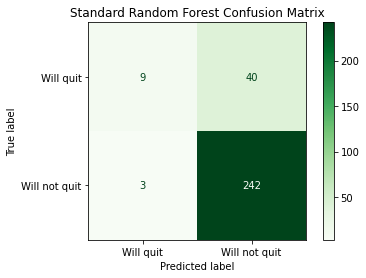

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig = plot_confusion_matrix(clf, X_test, y_test, display_labels=['Will quit', 'Will not quit'], cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')

Using Oversampling to try to correct the imbalance

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
#Prepping it for the random forest
X_unencoded = attrition.drop(['Attrition'],axis=1)
y_unencoded = attrition.Attrition

In [43]:
#using SMOTE to oversample
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)

In [44]:
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=20, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.908
Mean recall: 0.907
Mean precision: 0.909


In [48]:
SMOTE_SRF.fit(over_X_train,over_y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [49]:
y_pred = SMOTE_SRF.predict(X_test)

Accuracy: 0.9863945578231292


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'SMOTE + Standard Random Forest Confusion Matrix')

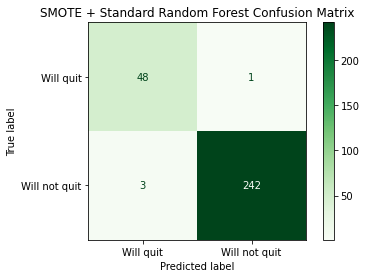

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['Will quit', 'Will not quit'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')

In [51]:
#Feature Importance
feature_imp = pd.Series(SMOTE_SRF.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

OverTime                    0.153356
StockOptionLevel            0.075472
JobSatisfaction             0.068521
MonthlyIncome               0.057158
JobInvolvement              0.049163
EnvironmentSatisfaction     0.046171
MonthlyRate                 0.045148
DailyRate                   0.040176
YearsWithCurrManager        0.037259
RelationshipSatisfaction    0.035882
DistanceFromHome            0.035748
YearsInCurrentRole          0.034643
HourlyRate                  0.033163
TotalWorkingYears           0.032357
YearsAtCompany              0.030430
Education                   0.027348
WorkLifeBalance             0.026038
JobLevel                    0.024285
JobRole                     0.024166
TrainingTimesLastYear       0.021415
BusinessTravel              0.021116
PercentSalaryHike           0.020308
NumCompaniesWorked          0.019439
YearsSinceLastPromotion     0.017948
EducationField              0.013101
Department                  0.005111
PerformanceRating           0.005076
d

Feature Importance Graph

In [53]:
fig = px.bar(feature_imp, title = "Feature Importance", orientation = "h")
fig.update_layout(showlegend = False)
fig.update_xaxes(title = "Feature")
fig.update_yaxes(title = "Importance")

Using the pybaobabdt library to visualize the trees that we created

In [ ]:
features1 = list(X_train.columns)

size = (15,15)
plt.rcParams['figure.figsize'] = size
fig = plt.figure(figsize=size, dpi=300)

for idx, tree in enumerate(SMOTE_SRF.estimators_):
    ax1 = fig.add_subplot(5, 4, idx+1)
    pybaobabdt.drawTree(tree, model=SMOTE_SRF, size=15, dpi=300, features=features1, ax=ax1)
    
fig.savefig('random-forest.png', format='png', dpi=1200, transparent=True)

# Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
tree1 = tree.DecisionTreeClassifier()
tree1 = tree1.fit(X_train,y_train)

In [ ]:
treeplot = tree.plot_tree(tree1)

In [ ]:
features = list(X_train.columns)

ax = pybaobabdt.drawTree(tree1, size=15, dpi=72, features=features)
